In [13]:
import csv
import folium 

# Interact on web [here](https://nbviewer.org/github/eiharun/SP25-20/blob/main/testing/balloon_logs/logs.ipynb?flush_cache=false) or [here](https://hub.2i2c.mybinder.org/user/eiharun-sp25-20-kedahdro/notebooks/testing/balloon_logs/logs.ipynb)
# View map [here](https://raw.githack.com/eiharun/SP25-20/refs/heads/main/testing/balloon_logs/testing-map.html)

In [14]:
with open("4-8-log.csv", "r") as f:
    reader = csv.reader(f, delimiter=",")
    data = list(reader)
    
with open("4-9-log.csv", "r") as f:
    reader = csv.reader(f, delimiter=",")
    data_4_9 = list(reader)
    
#concat the two lists
data = data + data_4_9[4:]

In [15]:
locations = {"Drone Field": [], "Prices Fork": [], "Bald Knob": [], "Buffalo": []}
miss_rate = {"Drone Field": [], "Prices Fork": [], "Bald Knob": [], "Buffalo": []}
snrs = {"Drone Field": [], "Prices Fork": [], "Bald Knob": [], "Buffalo": []}
rssis = {"Drone Field": [], "Prices Fork": [], "Bald Knob": [], "Buffalo": []}
current_location = None
recv_format = {data[2][x]: x for x in range(len(data[2]))}
gps_format = {data[3][x]: x for x in range(len(data[3]))}
last_coords=None
for line in data[4:]:
    if "Drone Field" in line[0]:
        current_location = "Drone Field"
    elif "Prices Fork" in line[0]:
        current_location = "Prices Fork"
    elif "Bald Knob" in line[0]:
        current_location = "Bald Knob"
    elif "Buffalo" in line[0]:
        current_location = "Buffalo"
    if current_location and line[0] == "RECV":
        num = line[recv_format["data"]]
        locations[current_location].append(num[num.rfind("#")+1:])
        snrs[current_location].append(int(line[recv_format["SNR(db)"]]))
        rssis[current_location].append(int(line[recv_format["RSSI(dBm)"]]))
        
print("{:<20}\t{:<20}".format("Packets Recieved", "Packets Sent"))
print("-"*40)
for location in locations:
    print("{:<20}\t{:<20}\t{}".format(len(locations[location]), int(locations[location][-1]) - int(locations[location][0])+1, location))
print("-"*40)

for location in locations:
    if len(locations[location]) == 0:
        miss_rate[location] = 0
    else:
        miss_rate[location] = 1-(len(locations[location]) / (int(locations[location][-1])-int(locations[location][0])+1))

print("Packet Drop Rate:")
for location in locations:
    print(f"{location}:\t{miss_rate[location]*100:<0.4f} %")
print("-"*40)
print("Average SNR:")
for location in locations:
    if len(snrs[location]) == 0:
        snrs[location] = 0
    else:
        average = sum(snrs[location]) / len(snrs[location])
    print(f"\t{location}:\t{average:<0.4f} db")
print("Min SNR:")
for location in locations:
    if len(snrs[location]) == 0:
        snrs[location] = 0
    else:
        minimum = min(snrs[location])
    print(f"\t{location}:\t{minimum:<0.4f} db")
print("Max SNR:")
for location in locations:
    if len(snrs[location]) == 0:
        snrs[location] = 0
    else:
        maximum = max(snrs[location])
    print(f"\t{location}:\t{maximum:<0.4f} db")
print("-"*40)
print("Average RSSI:")
for location in locations:
    if len(rssis[location]) == 0:
        rssis[location] = 0
    else:
        average = sum(rssis[location]) / len(rssis[location])
    print(f"\t{location}:\t{average:<0.4f} db")
print("Min RSSI:")
for location in locations:
    if len(rssis[location]) == 0:
        rssis[location] = 0
    else:
        minimum = min(rssis[location])
    print(f"\t{location}:\t{minimum:<0.4f} db")
print("Max RSSI:")
for location in locations:
    if len(rssis[location]) == 0:
        rssis[location] = 0
    else:
        maximum = max(rssis[location])
    print(f"\t{location}:\t{maximum:<0.4f} db")
print("-"*40)

Packets Recieved    	Packets Sent        
----------------------------------------
39                  	39                  	Drone Field
18                  	34                  	Prices Fork
272                 	290                 	Bald Knob
333                 	350                 	Buffalo
----------------------------------------
Packet Drop Rate:
Drone Field:	0.0000 %
Prices Fork:	47.0588 %
Bald Knob:	6.2069 %
Buffalo:	4.8571 %
----------------------------------------
Average SNR:
	Drone Field:	8.0256 db
	Prices Fork:	-13.6111 db
	Bald Knob:	-4.7647 db
	Buffalo:	-3.0300 db
Min SNR:
	Drone Field:	5.0000 db
	Prices Fork:	-21.0000 db
	Bald Knob:	-20.0000 db
	Buffalo:	-19.0000 db
Max SNR:
	Drone Field:	10.0000 db
	Prices Fork:	-5.0000 db
	Bald Knob:	6.0000 db
	Buffalo:	5.0000 db
----------------------------------------
Average RSSI:
	Drone Field:	-98.1538 db
	Prices Fork:	-136.9444 db
	Bald Knob:	-121.6765 db
	Buffalo:	-121.8198 db
Min RSSI:
	Drone Field:	-108.0000 db
	Prices Fork:	-144

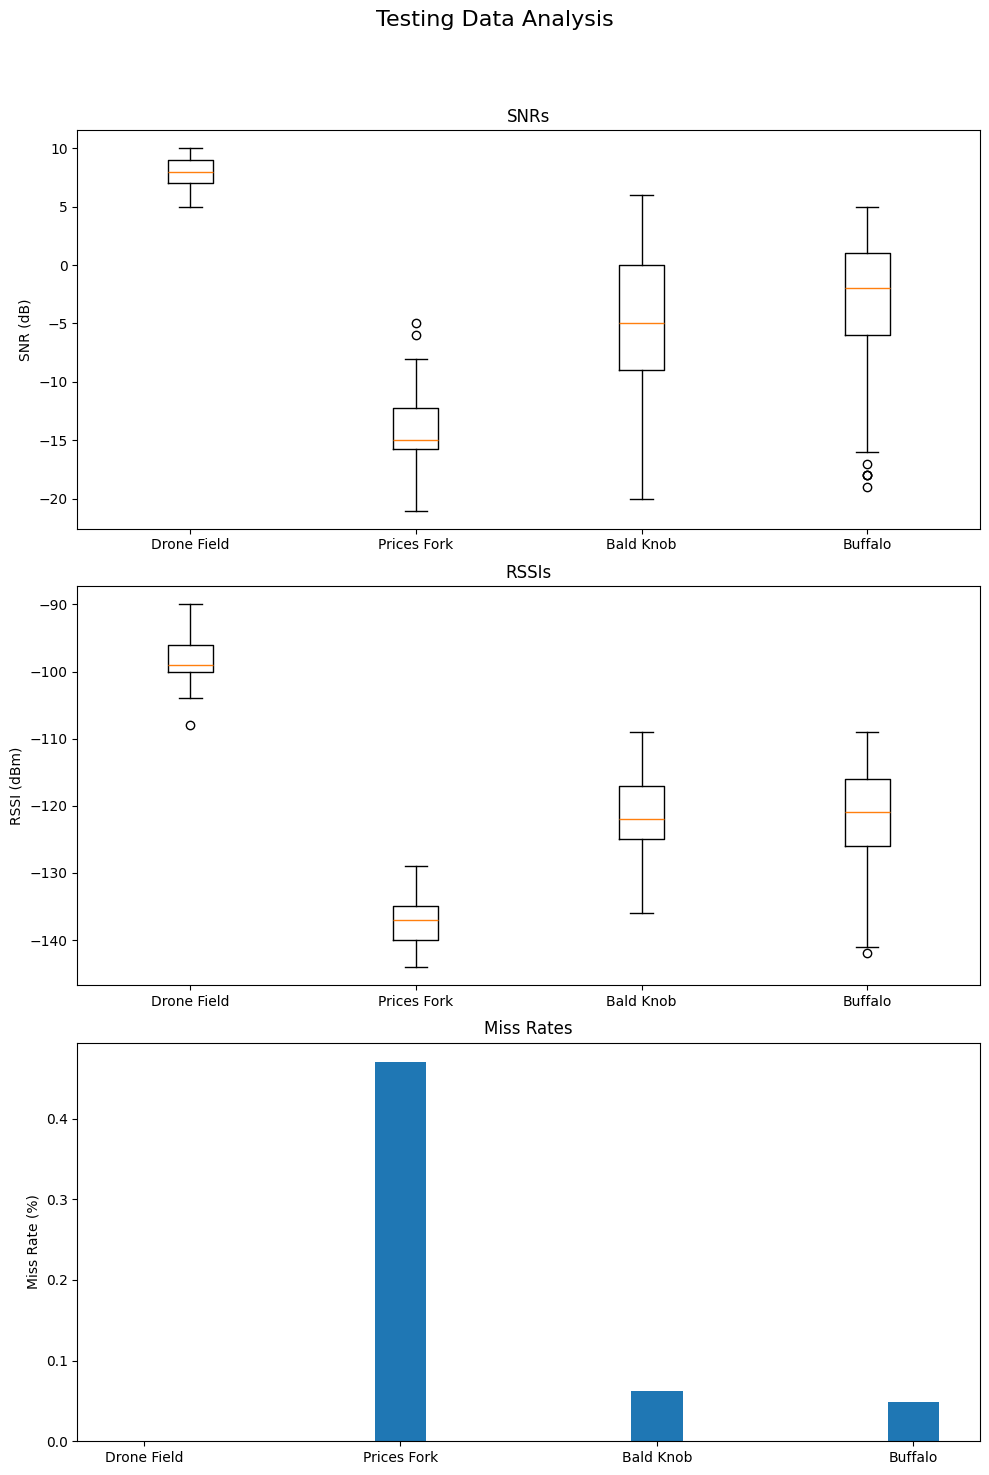

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
# Set the title
fig.suptitle('Testing Data Analysis', fontsize=16)
# Set the x-axis labels
x_labels = list(locations.keys())
x = np.arange(len(x_labels))
# Set the width of the bars
width = 0.2
# Plot the SNRs on a box and whisker plot
ax[0].boxplot([snrs[location] for location in locations], positions=x, widths=width)
ax[0].set_title('SNRs')
ax[0].set_ylabel('SNR (dB)')
ax[0].set_xticks(x)
ax[0].set_xticklabels(x_labels)

#Rssis
ax[1].boxplot([rssis[location] for location in locations], positions=x, widths=width)
ax[1].set_title('RSSIs')
ax[1].set_ylabel('RSSI (dBm)')
ax[1].set_xticks(x)
ax[1].set_xticklabels(x_labels)
#Miss Rates
ax[2].bar(x, [miss_rate[location] for location in locations], width=width)
ax[2].set_title('Miss Rates')
ax[2].set_ylabel('Miss Rate (%)')
ax[2].set_xticks(x)
ax[2].set_xticklabels(x_labels)
# Show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()




In [21]:
basemaps = {
    'Google Maps': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = True,
        control = True
    ),
    'Google Satellite': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Google Terrain': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Terrain',
        overlay = True,
        control = True
    ),
    'Google Satellite Hybrid': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Esri Satellite': folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True
    )
}

In [28]:
gs_coords = (37.23076314126423, -80.42473322034601)
map = folium.Map(location=gs_coords, zoom_start=10, max_zoom=25)
basemaps['Google Satellite Hybrid'].add_to(map)
folium.Marker(gs_coords, tooltip='Whittemore Roof', popup='Whittemore Roof',icon=folium.Icon(icon="house", prefix="fa",color="red")).add_to(map)

current_location = None
recv_format = {data[2][x]: x for x in range(len(data[2]))}
gps_format = {data[3][x]: x for x in range(len(data[3]))}
last_coords=None
for line in data[4:]:
    if "Drone Field" in line[0]:
        current_location = "Drone Field"
    elif "Prices Fork" in line[0]:
        current_location = "Prices Fork"
    elif "Bald Knob" in line[0]:
        current_location = "Bald Knob"
    elif "Buffalo" in line[0]:
        current_location = "Buffalo"
        
    if line[0] == "GPS":
        coords=(float(line[gps_format["Lat"]]), float(line[gps_format["Lon"]]))
        if coords != (1000.0, 1000.0):
            # if last_coords is not None:
            #     folium.PolyLine([last_coords, coords], color="blue", weight=2.5, opacity=1).add_to(map)
            last_coords = coords
            folium.CircleMarker(coords, 
                                popup="Periodic GPS",
                                color="green", 
                                fill=True, 
                                fill_opacity=0.4,
                                radius=5
                                ).add_to(map)
            
    if line[0] == "RECV":
        popup= f"SNR:{line[recv_format["SNR(db)"]]}dB\nRSSI:{line[recv_format["RSSI(dBm)"]]}dBm"
        data_num=line[recv_format['data']]
        tooltip = f"{current_location} #{data_num[data_num.rfind('#')+1:]}"
        coords=(float(line[recv_format["Lat"]]), float(line[recv_format["Lon"]]))
        if coords != (1000.0, 1000.0):
            # map snr value to radius where max snr is 10 and min snr is -21 on a logarithmic scale           
            radius = (int(line[recv_format["SNR(db)"]]) + 21) / 31 * 10
            folium.CircleMarker(coords, tooltip=tooltip, popup=popup,
                            color="blue",
                            fill=True,
                            fill_opacity=0.7,
                            radius=radius,
                            ).add_to(map)


map.save("testing-map.html")
map